In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [10]:
df.DATE = pd.to_datetime(df.DATE)

In [30]:
dfStocks = df[['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE', 'NASDAQ.CSCO','NASDAQ.EBAY']]
dfStocks.set_index(pd.DatetimeIndex(df['DATE']))

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
1970-01-01 00:00:01.491226200,143.6800,102.2300,81.0300,33.7400,33.3975
1970-01-01 00:00:01.491226260,143.7000,102.1400,81.2100,33.8800,33.3950
1970-01-01 00:00:01.491226320,143.6901,102.2125,81.2100,33.9000,33.4100
1970-01-01 00:00:01.491226380,143.6400,102.1400,81.1300,33.8499,33.3350
1970-01-01 00:00:01.491226440,143.6600,102.0600,81.1200,33.8400,33.4000
1970-01-01 00:00:01.491226500,143.7800,102.0400,81.2200,33.8800,33.4300
1970-01-01 00:00:01.491226560,143.8640,102.3300,81.1600,33.9000,33.4650
1970-01-01 00:00:01.491226620,143.8100,102.3700,81.1600,33.8900,33.5300
1970-01-01 00:00:01.491226680,143.8150,102.3800,81.1600,33.9200,33.5650


In [4]:
dfStocks.isnull().sum()

NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

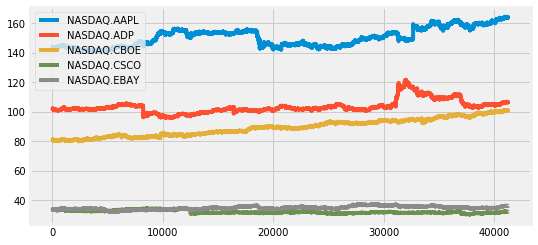

In [14]:
dfStocks.plot(figsize=(8,4))

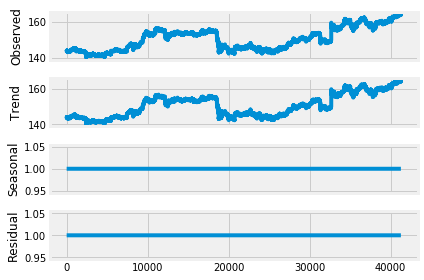

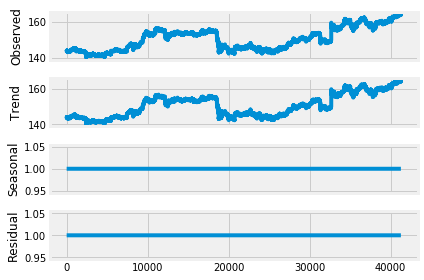

In [35]:
#So a few of the stocks have clear trends, let's check seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfStocks['NASDAQ.AAPL'], model="multiplicative",freq=1)
result.plot()

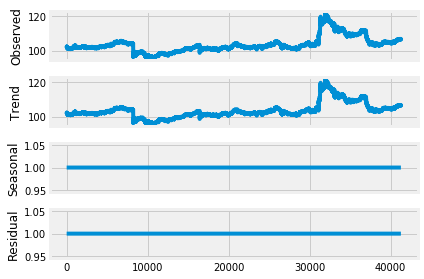

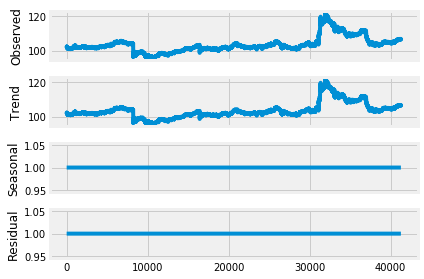

In [36]:
result = seasonal_decompose(dfStocks['NASDAQ.ADP'], model="multiplicative",freq=1)
result.plot()

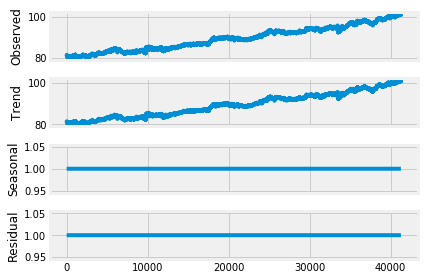

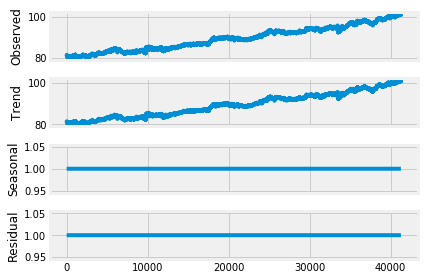

In [37]:
result = seasonal_decompose(dfStocks['NASDAQ.CBOE'], model="multiplicative",freq=1)
result.plot()

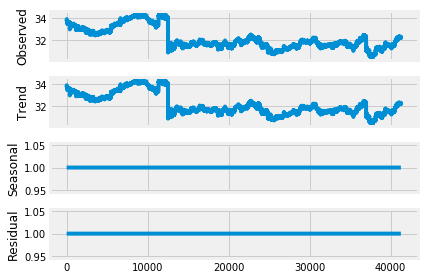

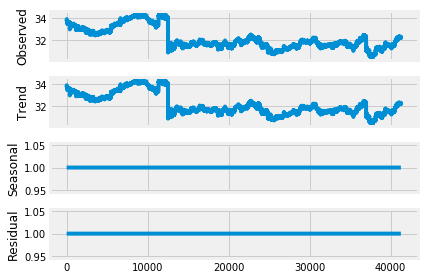

In [38]:
result = seasonal_decompose(dfStocks['NASDAQ.CSCO'], model="multiplicative",freq=1)
result.plot()

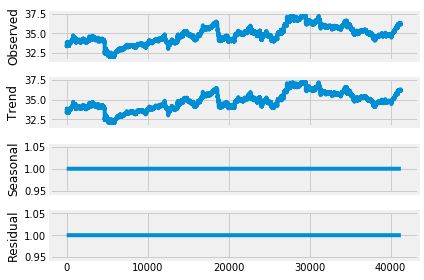

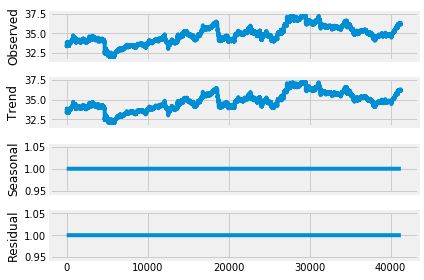

In [43]:
result = seasonal_decompose(dfStocks['NASDAQ.EBAY'], model="multiplicative",freq=1)
result.plot()

In [44]:
#no seasonality in any of the 5 stocks.  Not sure why those all double printed the plots
#so we need to difference the data, increase stationarity in order to analyze
diff = dfStocks.diff()

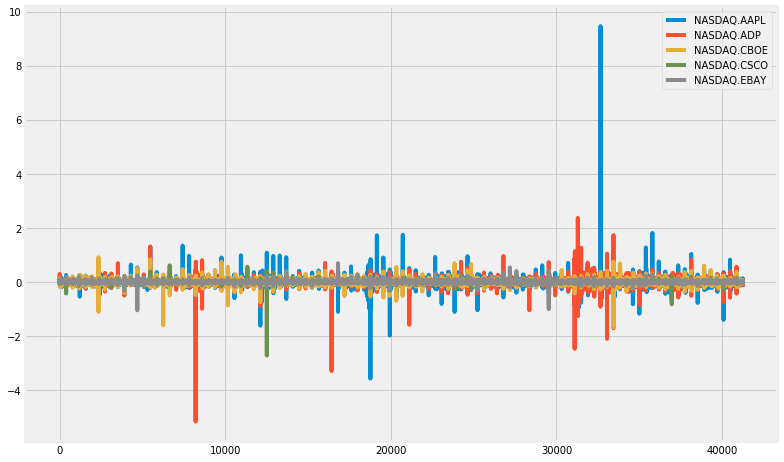

In [45]:
diff.plot(figsize=(12,8))

In [61]:
#the differencing process has created a 0 row of nan values.
diff.drop(index=0,axis=0,inplace=True)

In [89]:
#I probably didn't need to do the differencing calculations since auto_arima figures that out for me
from pmdarima.arima import auto_arima
AAPL_model = auto_arima(dfStocks['NASDAQ.AAPL'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
ADP_model = auto_arima(dfStocks['NASDAQ.ADP'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
CBOE_model = auto_arima(dfStocks['NASDAQ.CBOE'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
CSCO_model = auto_arima(dfStocks['NASDAQ.CSCO'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
EBAY_model = auto_arima(dfStocks['NASDAQ.EBAY'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=-78439.039, BIC=-78404.528, Fit time=11.898 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-78429.728, BIC=-78412.472, Fit time=0.008 seconds


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

Fit ARIMA: order=(1, 1, 0); AIC=-78431.998, BIC=-78406.115, Fit time=0.280 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-78432.156, BIC=-78406.272, Fit time=0.198 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-78446.292, BIC=-78403.153, Fit time=11.911 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-78443.253, BIC=-78408.742, Fit time=0.212 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2); AIC=-78444.898, BIC=-78384.504, Fit time=15.558 seconds
Fit ARIMA: order=(3, 1, 1); AIC=-78444.668, BIC=-78392.901, Fit time=16.013 seconds
Total fit time: 65.700 seconds
-64678.28420151926
Fit ARIMA: order=(1, 1, 1); AIC=-97549.461, BIC=-97514.950, Fit time=10.320 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-97402.880, BIC=-97385.625, Fit time=0.007 seconds


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

Fit ARIMA: order=(1, 1, 0); AIC=-97535.292, BIC=-97509.409, Fit time=0.285 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-97541.725, BIC=-97515.842, Fit time=0.158 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-97565.551, BIC=-97522.412, Fit time=10.827 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-97560.419, BIC=-97525.908, Fit time=0.402 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-97576.123, BIC=-97524.356, Fit time=11.877 seconds
Fit ARIMA: order=(3, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=-97562.578, BIC=-97519.439, Fit time=11.719 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-97585.711, BIC=-97525.317, Fit time=22.331 seconds
Fit ARIMA: order=(3, 1, 1); AIC=-97569.065, BIC=-97517.299, Fit time=10.960 seconds
Total fit time: 88.127 seconds
-64678.28420151926
Fit ARIMA: order=(1, 1, 1); AIC=-136322.221, BIC=-136287.710, Fit time=11.455 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-135929.562, BIC=-135912.306, Fit time=0.006 seconds


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

Fit ARIMA: order=(1, 1, 0); AIC=-136162.631, BIC=-136136.748, Fit time=0.388 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-136187.630, BIC=-136161.747, Fit time=0.277 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-136321.733, BIC=-136278.594, Fit time=12.719 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-136321.828, BIC=-136278.689, Fit time=15.609 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-136321.350, BIC=-136269.583, Fit time=28.444 seconds
Total fit time: 68.902 seconds
-64678.28420151926
Fit ARIMA: order=(1, 1, 1); AIC=-200391.896, BIC=-200357.384, Fit time=14.371 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-200306.801, BIC=-200289.545, Fit time=0.011 seconds


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

Fit ARIMA: order=(1, 1, 0); AIC=-200314.816, BIC=-200288.932, Fit time=0.353 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-200315.600, BIC=-200289.717, Fit time=0.279 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-200410.273, BIC=-200367.134, Fit time=11.462 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-200368.488, BIC=-200333.977, Fit time=0.463 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-200441.313, BIC=-200389.546, Fit time=14.756 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-200510.989, BIC=-200441.967, Fit time=20.143 seconds
Fit ARIMA: order=(2, 1, 3); AIC=-200447.097, BIC=-200386.703, Fit time=21.370 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 99.081 seconds
-64678.28420151926
Fit ARIMA: order=(1, 1, 1); AIC=-193450.269, BIC=-193415.758, Fit time=9.974 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-193381.935, BIC=-193364.679, Fit time=0.012 seconds


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

Fit ARIMA: order=(1, 1, 0); AIC=-193450.606, BIC=-193424.723, Fit time=0.278 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-193449.528, BIC=-193423.645, Fit time=0.236 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-193450.570, BIC=-193416.059, Fit time=0.396 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-193448.575, BIC=-193405.436, Fit time=12.072 seconds
Total fit time: 22.970 seconds
-64678.28420151926


In [90]:
#we have the model built so let's split our data into train & test
len(dfStocks.index)*0.7

28886.199999999997

In [91]:
AAPLtrain = dfStocks['NASDAQ.AAPL'].loc[0:28885]
AAPLtest = dfStocks['NASDAQ.AAPL'].loc[28886:]
ADPtrain = dfStocks['NASDAQ.ADP'].loc[0:28885]
ADPtest = dfStocks['NASDAQ.ADP'].loc[28886:]
CBOEtrain = dfStocks['NASDAQ.CBOE'].loc[0:28885]
CBOEtest = dfStocks['NASDAQ.CBOE'].loc[28886:]
CSCOtrain = dfStocks['NASDAQ.CSCO'].loc[0:28885]
CSCOtest = dfStocks['NASDAQ.CSCO'].loc[28886:]
EBAYtrain = dfStocks['NASDAQ.EBAY'].loc[0:28885]
EBAYtest = dfStocks['NASDAQ.EBAY'].loc[28886:]


In [92]:
#fit the model
AAPL_model.fit(AAPLtrain)
ADP_model.fit(ADPtrain)
CBOE_model.fit(CBOEtrain)
CSCO_model.fit(CSCOtrain)
EBAY_model.fit(EBAYtrain)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [93]:
#predict the last 30% of data points
AAPL_forecast = AAPL_model.predict(n_periods=12380)
ADP_forecast = ADP_model.predict(n_periods=12380)
CBOE_forecast = ADP_model.predict(n_periods=12380)
CSCO_forecast = CSCO_model.predict(n_periods=12380)
EBAY_forecast = EBAY_model.predict(n_periods=12380)

In [94]:
AAPL_forecast[0:5]

array([150.61213258, 150.6122426 , 150.61254559, 150.61274802,
       150.61301065])

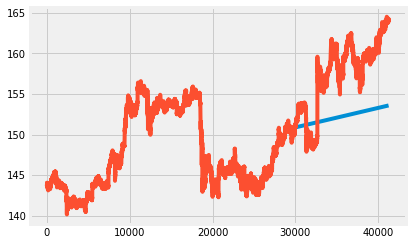

In [143]:
#AAPL retults
AAPLempty =pd.DataFrame(np.full(len(train), np.nan))
AAPLresult = AAPLempty.append(AAPL_forecast2,ignore_index=True)
plt.plot(AAPLresult) # plotting t, b separately 
plt.plot(dfStocks['NASDAQ.AAPL']) # plotting t, c separately 
plt.show()

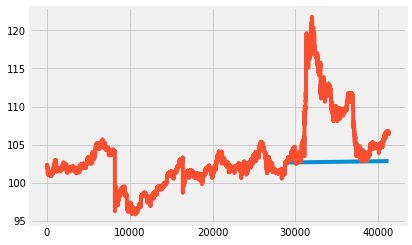

In [149]:
#ADP retults
ADP_forecast2 = pd.DataFrame(ADP_forecast)
ADPempty =pd.DataFrame(np.full(len(train), np.nan))
ADPresult = ADPempty.append(ADP_forecast2,ignore_index=True)
plt.plot(ADPresult) # plotting t, b separately 
plt.plot(dfStocks['NASDAQ.ADP']) # plotting t, c separately 
plt.show()

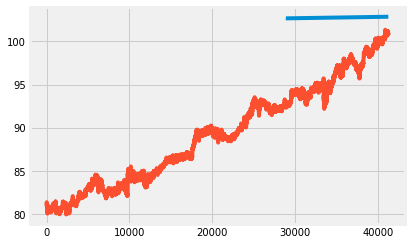

In [151]:
#CBOE retults
CBOE_forecast2 = pd.DataFrame(CBOE_forecast)
CBOEempty =pd.DataFrame(np.full(len(train), np.nan))
CBOEresult = CBOEempty.append(CBOE_forecast2,ignore_index=True)
plt.plot(CBOEresult) # plotting t, b separately 
plt.plot(dfStocks['NASDAQ.CBOE']) # plotting t, c separately 
plt.show()

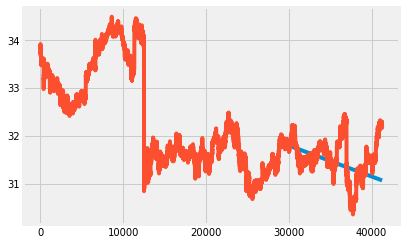

In [152]:
#CSCO retults
CSCO_forecast2 = pd.DataFrame(CSCO_forecast)
CSCOempty =pd.DataFrame(np.full(len(train), np.nan))
CSCOresult = CSCOempty.append(CSCO_forecast2,ignore_index=True)
plt.plot(CSCOresult) # plotting t, b separately 
plt.plot(dfStocks['NASDAQ.CSCO']) # plotting t, c separately 
plt.show()

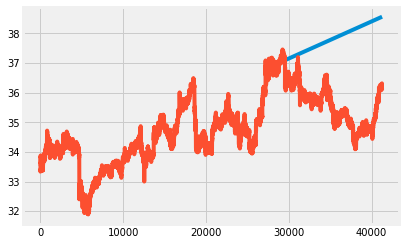

In [153]:
#EBAY retults
EBAY_forecast2 = pd.DataFrame(EBAY_forecast)
EBAYempty =pd.DataFrame(np.full(len(train), np.nan))
EBAYresult = EBAYempty.append(EBAY_forecast2,ignore_index=True)
plt.plot(EBAYresult) # plotting t, b separately 
plt.plot(dfStocks['NASDAQ.EBAY']) # plotting t, c separately 
plt.show()

In [ ]:
#so overall the predictions are pretty terrible.  Sorry.